# Plant Disease Classification

### Import all the Dependencies

In [4]:
!pip install Pillow


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        r"C:\Users\DELL\Desktop\satyajitAll\Satyajit_Project\Main_Project\training\output\train",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         
)

Found 10884 images belonging to 11 classes.


In [4]:
train_generator.class_indices

{'Pepper_Bacterial_spot': 0,
 'Pepper_healthy': 1,
 'Potato_Early_blight': 2,
 'Potato_Late_blight': 3,
 'Potato_healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Target_Spot': 9,
 'Tomato_healthy': 10}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper_Bacterial_spot',
 'Pepper_healthy',
 'Potato_Early_blight',
 'Potato_Late_blight',
 'Potato_healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Target_Spot',
 'Tomato_healthy']

In [7]:
import scipy

In [7]:
import matplotlib.pyplot as plt
for image_batch,label_batch in train_generator:
    print(image_batch[0])

[[[0.4523737  0.4360231  0.42425838]
  [0.4777916  0.45818377 0.44641906]
  [0.4683578  0.44874993 0.43698522]
  ...
  [0.67799664 0.66231036 0.6583888 ]
  [0.6797501  0.6640638  0.66014224]
  [0.68150353 0.66581726 0.6618957 ]]

 [[0.44886684 0.43295455 0.42118984]
  [0.47823    0.45862213 0.44685742]
  [0.47274143 0.45313358 0.44136888]
  ...
  [0.68235296 0.6750904  0.6683609 ]
  [0.68235296 0.6764055  0.6692377 ]
  [0.68235296 0.6777206  0.6701144 ]]

 [[0.44727123 0.43158495 0.41982025]
  [0.47653583 0.45716494 0.44540024]
  [0.47477135 0.4551635  0.4433988 ]
  ...
  [0.62946993 0.62554836 0.6177052 ]
  [0.621141   0.61721945 0.6093763 ]
  [0.6128121  0.60889053 0.6010474 ]]

 ...

 [[0.4593896  0.45154646 0.45546803]
  [0.45895126 0.45110813 0.4550297 ]
  [0.45633814 0.448495   0.45241657]
  ...
  [0.60784316 0.60784316 0.6156863 ]
  [0.58807516 0.58807516 0.5959183 ]
  [0.5536972  0.5536972  0.56154037]]

 [[0.43217602 0.4243329  0.42825446]
  [0.4286691  0.42082596 0.42474753]


[[[0.6876468  0.617516   0.5917971 ]
  [0.61809    0.5418705  0.5166313 ]
  [0.55690926 0.47341597 0.44427764]
  ...
  [0.43845314 0.3953159  0.41100216]
  [0.43301454 0.3898773  0.40556356]
  [0.42757595 0.3844387  0.40012497]]

 [[0.69015694 0.6208628  0.5947256 ]
  [0.6318956  0.55609447 0.53127366]
  [0.55398077 0.47174254 0.4430226 ]
  ...
  [0.38914236 0.3460051  0.3616914 ]
  [0.3996012  0.35646394 0.3721502 ]
  [0.41006002 0.36692277 0.38260904]]

 [[0.69266707 0.62420964 0.597654  ]
  [0.6457012  0.57031846 0.5459161 ]
  [0.55105233 0.47006914 0.44176754]
  ...
  [0.48646918 0.44333193 0.4590182 ]
  [0.4923261  0.44918886 0.46487513]
  [0.49818307 0.45504582 0.4707321 ]]

 ...

 [[0.38659275 0.484632   0.40556416]
  [0.3870111  0.48505032 0.4051458 ]
  [0.38742948 0.4854687  0.40472743]
  ...
  [0.3491739  0.3098965  0.3138489 ]
  [0.3685597  0.32150084 0.32934397]
  [0.33736616 0.29030734 0.29815048]]

 [[0.37018225 0.47499138 0.38361192]
  [0.36683545 0.47289962 0.37984672]


KeyboardInterrupt: 

In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        r"C:\Users\DELL\Desktop\satyajitAll\Satyajit_Project\Main_Project\training\output\val",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1357 images belonging to 11 classes.


In [11]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
       r"C:\Users\DELL\Desktop\satyajitAll\Satyajit_Project\Main_Project\training\output\test",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1369 images belonging to 11 classes.


In [12]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.3597513  0.3479866  0.39112386]
  [0.34938246 0.33761775 0.380755  ]
  [0.44675714 0.43499243 0.47812968]
  ...
  [0.45396164 0.44219694 0.4696479 ]
  [0.44656587 0.43480116 0.46225214]
  [0.43922976 0.42746505 0.45491603]]

 [[0.35235557 0.34059086 0.38372812]
  [0.35108918 0.33932447 0.38246173]
  [0.43196565 0.42020094 0.46333823]
  ...
  [0.45019883 0.43843412 0.4658851 ]
  [0.45247447 0.44070977 0.46816075]
  [0.4547501  0.4429854  0.47043636]]

 [[0.34495983 0.33319512 0.37633237]
  [0.35279587 0.34103116 0.38416842]
  [0.4171742  0.4054095  0.44854674]
  ...
  [0.52791804 0.51615334 0.5436043 ]
  [0.54327846 0.53151375 0.5589647 ]
  [0.5586389  0.5468741  0.57432514]]

 ...

 [[0.25878185 0.25486028 0.30976224]
  [0.26219526 0.2582737  0.31317565]
  [0.26560867 0.2616871  0.3165891 ]
  ...
  [0.19451195 0.19451195 0.24157077]
  [0.21227358 0.21227358 0.25933242]
  [0.23261784 0.23261784 0.27967668]]

 [[0.27828607 0.2743645  0.32926646]
  [0.2799928  0.27607122 0.33097318]


## Building the Model

In [17]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)       

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
215/32

6.71875

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=47, #1506/32
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6, #215/32
    verbose=1,
    epochs=40,
)

Epoch 1/40
47/47 [==============================] - 85s 2s/step - loss: 2.4236 - accuracy: 0.1210 - val_loss: 2.3557 - val_accuracy: 0.2292
Epoch 2/40
47/47 [==============================] - 84s 2s/step - loss: 2.3382 - accuracy: 0.1529 - val_loss: 2.3391 - val_accuracy: 0.1875
Epoch 3/40
47/47 [==============================] - 81s 2s/step - loss: 2.2760 - accuracy: 0.2141 - val_loss: 2.4026 - val_accuracy: 0.2292
Epoch 4/40
41/47 [=========================>....] - ETA: 10s - loss: 2.0658 - accuracy: 0.2729

In [ ]:
scores = model.evaluate(test_generator)

In [19]:
scores

[0.5093444585800171, 0.8477842211723328]

In [38]:
scores

[0.2162075936794281, 0.953250527381897]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [39]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [40]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [42]:
type(history.history['loss'])

list

In [43]:
len(history.history['loss'])

20

In [44]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.1562827229499817,
 0.15867453813552856,
 0.1525278240442276,
 0.15623898804187775,
 0.18486176431179047]

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [46]:
val_acc

[0.9375,
 0.90625,
 0.9583333134651184,
 0.9010416865348816,
 0.9583333134651184,
 0.9375,
 0.9270833134651184,
 0.875,
 0.9114583134651184,
 0.9270833134651184,
 0.9166666865348816,
 0.9270833134651184,
 0.9479166865348816,
 0.953125,
 0.9270833134651184,
 0.9322916865348816,
 0.9375,
 0.9270833134651184,
 0.9166666865348816,
 0.9427083134651184]

In [47]:
acc

[0.9441489577293396,
 0.9430894255638123,
 0.9501329660415649,
 0.9448138475418091,
 0.9328457713127136,
 0.9541223645210266,
 0.948803186416626,
 0.9594414830207825,
 0.946143627166748,
 0.9375,
 0.9448138475418091,
 0.9561170339584351,
 0.9547872543334961,
 0.9607046246528625,
 0.9593495726585388,
 0.966802179813385,
 0.9647606611251831,
 0.9547872543334961,
 0.9441489577293396,
 0.960106372833252]

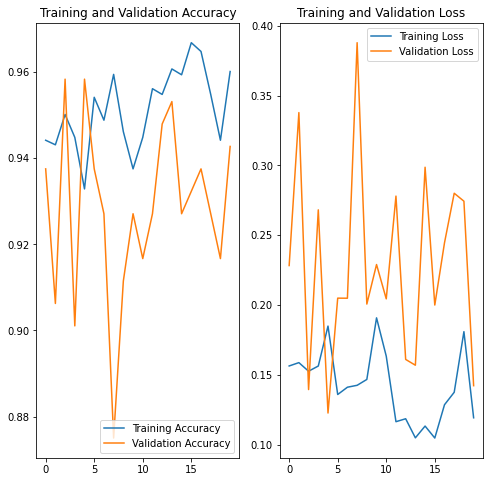

In [49]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato_Early_blight
predicted label: Tomato_Early_blight


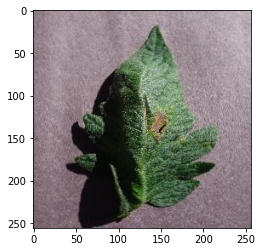

In [50]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

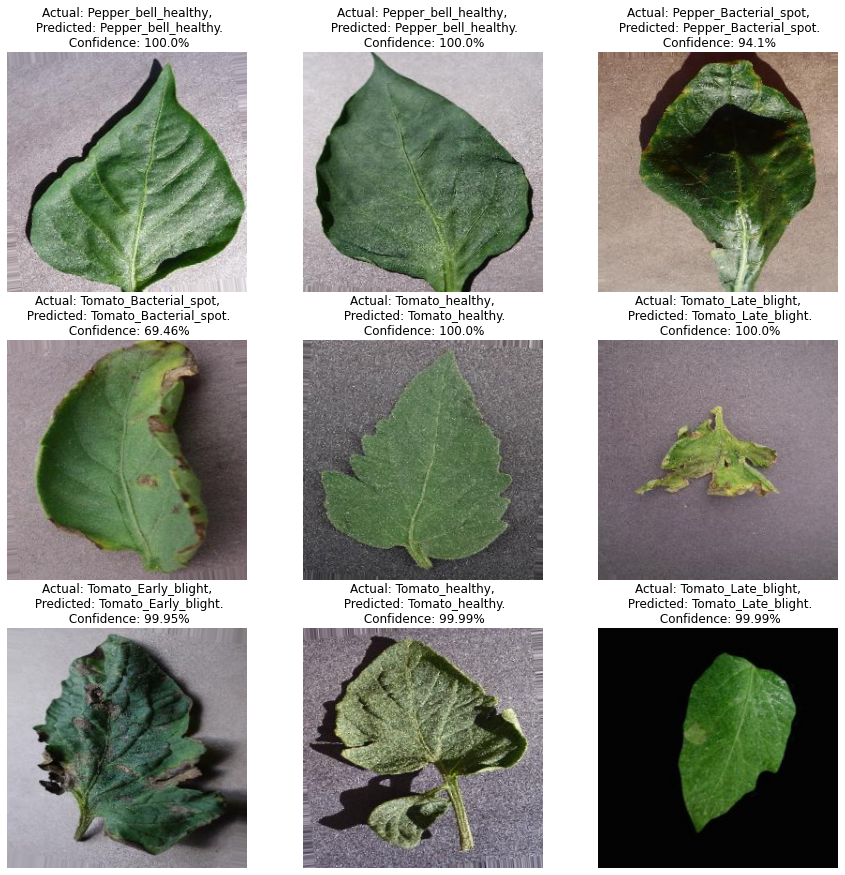

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [53]:
model.save("../full.h5")